<h1>THE SPARKS FOUNDATION</h1>
<h1>DATA SCIENCE AND BUSINESS ANALYTICS</h1>
<h1>Name: Bassant Mahmoud Hassan Ali</h1>
<h6>GRIP SEPTEMBER 2023 BATCH</h6>
<h1> TASK 1: Prediction using Supervised ML</h1>

# Importing the libraries

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Importing the dataset 

In [33]:
data = pd.read_csv('data.csv')

# Data Visualisation and Analysis

In [34]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [35]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [36]:
# checks if there is any null value in each  column
data.isnull().any()

Hours     False
Scores    False
dtype: bool

<AxesSubplot:>

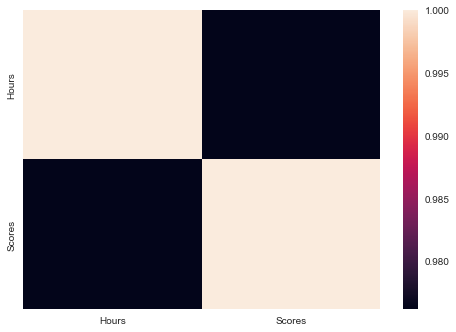

In [37]:
# Building the Correlation matrix
sns.heatmap(data.corr())

**heatmap shows dependency or relation between the variable and the other variables where 1 mean strong relation, 0 mean weak relation.**


**we can see that there is a strong relation between Hours and Scores**

we want to make normalization (scaling) for numerical data (become between 0 to 1) to increase accuracy.
we want to convert state to numerical data.

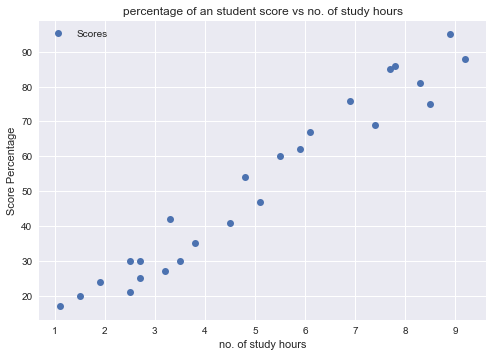

In [47]:
# a 2D plot to illustrate the linear relation between Hours and Scores
data.plot(x='Hours', y='Scores', title= "percentage of an student score vs no. of study hours",style='o')
plt.style.use('seaborn')
plt.xlabel("no. of study hours")
plt.ylabel("Score Percentage")
plt.show(block=True)

**It proves and explained the Correlation matrix more** \
**There is a linear relation between Hours and Scores**

# Extracting the Independent and Dependent variables

In [39]:
X = data[['Hours']].values # features/inputs
y = data[['Scores']].values # tragets/outputs

# Splitting the dataset into the Training set and Test set

In [40]:
from sklearn.model_selection import train_test_split
# 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Training the model on training set

In [41]:
# Fitting Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train) # gets the coefficients of the model (estimated y) [estimated Scores = a0 + a1 Hours]

LinearRegression()

In [42]:
# Calculating the Coefficients (a1)
print(regressor.coef_)

[[9.91065648]]


In [43]:
# Calculating the Intercept (a0)
print(regressor.intercept_)

[2.01816004]


# Evaluating the Model on testing set

In [44]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [45]:
# compare predicted outputs (y_pred) with actual outputs y_test) [we want y_pred to be near to y_test]

from sklearn import metrics

print('Mean Absolute Error:',
      metrics.mean_absolute_error(y_test, y_pred))

print('Mean Squared Error:',
      metrics.mean_squared_error(y_test, y_pred))

print('Root Mean Squared Error:',
      np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('R squared value:',
    r2_score(y_test, y_pred) )

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.598769307217406
Root Mean Squared Error: 4.647447612100367
R squared value: 0.9454906892105355


# What will be the predicted score if a student studies for 9.25 hours/day ?

In [46]:
hrs = [[9.25]]
score = regressor.predict(hrs)
print("if No of Hours is",hrs[0][0], "then The Predicted Score is", score[0][0])

if No of Hours is 9.25 then The Predicted Score is 93.69173248737535
